In [2]:
import pandas as pd
import re

In [3]:
f = open('WhatsApp Chat with Chain Reaction Peeps.txt','r',encoding='utf-8')
data = f.read()

In [3]:
# print(data)

In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)
len(messages)

20433

In [5]:
messages[:15]

['',
 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Adi DS: <Media omitted>\n',
 'Sarvy: Pendrive corrupt hua toh kya krne ka\n',
 'Adi DS: abhi hi naya liya na tu toh?\n',
 'Sarvy: <Media omitted>\n',
 'Sarvy: F\n',
 'Sarvy: Tereko yaad h 😂\n',
 'Adi DS: sab tere jaise thodi hote hai\n',
 'Sarvy: Bolna\n',
 'Sarvy: Ha\n',
 'Adi DS: corrupted files daalega toh corrupt hi hoga na\n',
 'Adi DS: <Media omitted>\n',
 'Sarvy: Aree but folder me files dikh hi nai rha\n',
 'Sarvy: Sab me vo bhi\n']

In [6]:
dates = re.findall(pattern,data)
dates[:20]

['7/7/22, 22:56 - ',
 '7/7/22, 23:11 - ',
 '7/7/22, 23:11 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:12 - ',
 '7/7/22, 23:13 - ',
 '7/7/22, 23:13 - ',
 '7/7/22, 23:13 - ',
 '7/7/22, 23:13 - ',
 '7/7/22, 23:13 - ',
 '7/7/22, 23:14 - ',
 '7/8/22, 08:25 - ',
 '7/8/22, 08:56 - ',
 '7/8/22, 09:05 - ']

In [7]:
def yearformatter(s):
  pattern = "\d{1,2}/\d{1,2}/"
# s = df.Date[0]
  re.split(pattern,s)
  return re.findall(pattern,s)[0] + '20' + re.split(pattern,s)[1]


In [8]:
df = pd.DataFrame({'user_messages':messages[1:],'Date':dates})
# Convert the message_date type to datetime
df['Date'] = df['Date'].astype(str).apply(lambda x: yearformatter(x))
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y, %H:%M - ")
df.head()

,user_messages,Date
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00
1,Adi DS: <Media omitted>\n,2022-07-07 23:11:00
2,Sarvy: Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00
3,Adi DS: abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00
4,Sarvy: <Media omitted>\n,2022-07-07 23:12:00


In [9]:
df.shape

(20432, 2)

In [10]:
df.dtypes

user_messages            object
Date             datetime64[ns]
dtype: object

In [11]:
users = []
messages = []
for i in df['user_messages']:
  if ':' in i:
    x = i.split(':')
    users.append(x[0])
    messages.append(x[1])
  else:
    messages.append(i)
    users.append('group_notification')

In [12]:
df['Users'] = users
df['user_messages'] = messages
df.head()

,user_messages,Date,Users
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy


In [13]:
users

['group_notification',
 'Adi DS',
 'Sarvy',
 'Adi DS',
 'Sarvy',
 'Sarvy',
 'Sarvy',
 'Adi DS',
 'Sarvy',
 'Sarvy',
 'Adi DS',
 'Adi DS',
 'Sarvy',
 'Sarvy',
 'Sarvy',
 'Adi DS',
 'Adi DS',
 'ankit Ladva Djsce',
 'Shubham Kurungar Djsce DS',
 'ankit Ladva Djsce',
 'ankit Ladva Djsce',
 'ankit Ladva Djsce',
 'Shubham Kurungar Djsce DS',
 'Shubham Kurungar Djsce DS',
 'Shubham Kurungar Djsce DS',
 'Adi DS',
 'ankit Ladva Djsce',
 'ankit Ladva Djsce',
 'Sarvy',
 'Sarvy',
 'Sarvy',
 'Shubham Kurungar Djsce DS',
 'Sarvy',
 'Sarvy',
 'Bhagya Shah Djsce',
 'Bhagya Shah Djsce',
 'Sarvy',
 'Sarvy',
 'Bhagya Shah Djsce',
 'Adi DS',
 'Adi DS',
 'Bhagya Shah Djsce',
 'Shubham Kurungar Djsce DS',
 'ankit Ladva Djsce',
 'ankit Ladva Djsce',
 'Adi DS',
 'ankit Ladva Djsce',
 'Adi DS',
 'Adi DS',
 'ankit Ladva Djsce',
 'Adi DS',
 'Adi DS',
 'Vallabh Shelar Djsce',
 'Vallabh Shelar Djsce',
 'Sarvy',
 'Harshit Singh Djsce DS',
 'ankit Ladva Djsce',
 'ankit Ladva Djsce',
 'Shubham Kurungar Djsce DS',
 'B

In [14]:
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' <Media omitted>\n',
 ' Pendrive corrupt hua toh kya krne ka\n',
 ' abhi hi naya liya na tu toh?\n',
 ' <Media omitted>\n',
 ' F\n',
 ' Tereko yaad h 😂\n',
 ' sab tere jaise thodi hote hai\n',
 ' Bolna\n',
 ' Ha\n',
 ' corrupted files daalega toh corrupt hi hoga na\n',
 ' <Media omitted>\n',
 ' Aree but folder me files dikh hi nai rha\n',
 ' Sab me vo bhi\n',
 ' Hidden sab check kiya no soln 🥲\n',
 ' youtube dekh\n',
 ' mai jyada pendrive use nahi karta..\n',
 ' Flipkart grid hua ?\n',
 ' Matlab selection?\n',
 ' Ha re first round\n',
 ' Apna bhi hua\n',
 ' Nahi\n',
 ' Hua ki nahi hua?\n',
 ' Mujhe to mail nahi aya hai kuch\n',
 ' @918104705838 @919819646702 @917738735184  tum log ka hua?\n',
 ' nhai\n',
 ' .\n',
 ' .\n',
 ' .\n',
 ' https',
 ' Chalo uganda 😂\n',
 ' 31 million tonnes 😳😳\n',
 ' aab vapas hoga British raj 😂\n',
 ' Pura lootna

In [15]:
df['Year'] = df['Date'].dt.year

In [16]:
df.head()

,user_messages,Date,Users,Year
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022


In [17]:
df['Month'] = df['Date'].dt.month_name()

In [18]:
df['Day'] = df['Date'].dt.day

In [19]:
df.head()

,user_messages,Date,Users,Year,Month,Day
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022,July,7
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7


In [20]:
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df.head()

,user_messages,Date,Users,Year,Month,Day,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022,July,7,22,56
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7,23,11
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7,23,11
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12


In [21]:
df[df['Users']=='Adi DS'].shape[0]

7211

In [22]:
df[df['user_messages'] == " <Media omitted>\n"]

,user_messages,Date,Users,Year,Month,Day,Hour,Minute
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7,23,11
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12
11,<Media omitted>\n,2022-07-07 23:13:00,Adi DS,2022,July,7,23,13
46,<Media omitted>\n,2022-07-08 14:00:00,ankit Ladva Djsce,2022,July,8,14,0
48,<Media omitted>\n,2022-07-08 14:01:00,Adi DS,2022,July,8,14,1
...,...,...,...,...,...,...,...,...
20354,<Media omitted>\n,2023-01-28 21:52:00,Adi DS,2023,January,28,21,52
20357,<Media omitted>\n,2023-01-28 21:53:00,Harshit Singh Djsce DS,2023,January,28,21,53
20368,<Media omitted>\n,2023-01-28 21:56:00,Adi DS,2023,January,28,21,56
20410,<Media omitted>\n,2023-01-30 15:35:00,Adi DS,2023,January,30,15,35


In [23]:
df.head()

,user_messages,Date,Users,Year,Month,Day,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022,July,7,22,56
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7,23,11
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7,23,11
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12


In [24]:
df.user_messages[1]

' <Media omitted>\n'

In [25]:
# !pip install urlextract
from urlextract import URLExtract
extract  = URLExtract()
message = "Lets say www.google.com fb.in deeplearning.ai sarvagya1947@gmail.com sarvay.com gmail@.com"
extract.find_urls(message)

['www.google.com', 'fb.in', 'deeplearning.ai', 'sarvay.com']

In [26]:
x = df['Users'].value_counts()[:-1]

In [27]:
import matplotlib.pyplot as plt
name = x.index
count = x.values

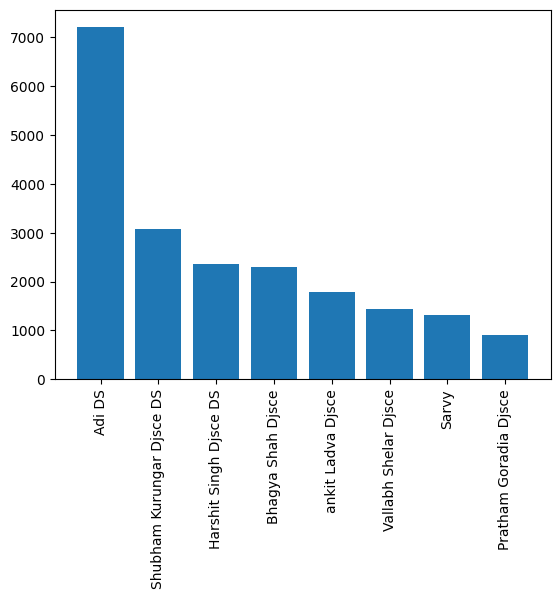

In [28]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [29]:
percent_df = round(df['Users'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'Users','Users':'percent'})

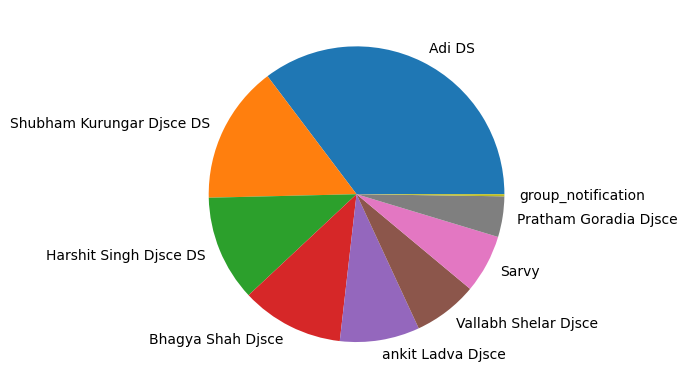

In [30]:
fig,ax = plt.subplots()
ax.pie(percent_df['percent'],labels=percent_df['Users'])
plt.show()

In [31]:
temp = df[df['Users']!='group_notification']
temp = temp[temp['user_messages']!=' <Media omitted>\n']

In [32]:
temp.head()

,user_messages,Date,Users,Year,Month,Day,Hour,Minute
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7,23,11
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12
5,F\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12
6,Tereko yaad h 😂\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12
7,sab tere jaise thodi hote hai\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12


In [33]:
f = open('stop_hinglish.txt')
stopwords = f.read()
print(stopwords)

.
..
...
?
-
--
=
hai?
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
cou

In [34]:
words = []
for i in temp.user_messages:
  for word in i.lower().split():
    if word not in stopwords:
      if word[0] != '@':
        words.append(word) 

In [35]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(30)).head()

,0,1
0,😂,280
1,phir,270
2,https,239
3,bhej,190
4,kidhar,179


In [41]:
!pip uninstall emoji
!pip install emoji==1.7

^C
     ------------------------------------- 175.4/175.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171059 sha256=ea5dd0b00be94e0578629bf728efaf9b56d9965ffd0055497432315291ba5f60
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\31\8a\8c\315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import emoji
emojis= []
for message in df.user_messages:
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,1291
1,🤣,241
2,😭,162
3,🥳,130
4,😅,93
...,...,...
161,😩,1
162,😫,1
163,😖,1
164,😟,1


In [45]:
df['month_num'] = df['Date'].dt.month
df.head()

,user_messages,Date,Users,Year,Month,Day,Hour,Minute,month_num
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022,July,7,22,56,7
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7,23,11,7
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7,23,11,7
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12,7
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12,7


In [58]:
timeline = df.groupby(['Year','month_num','Month']).count()['user_messages'].reset_index()
timeline

,Year,month_num,Month,user_messages
0,2022,7,July,1476
1,2022,8,August,1571
2,2022,9,September,1682
3,2022,10,October,2738
4,2022,11,November,4011
5,2022,12,December,5722
6,2023,1,January,3232


In [60]:
time = []
for i in range(timeline.shape[0]):
  time.append(timeline.Month[i] + '-' + str(timeline.Year[i]))

In [62]:
timeline['time'] = time

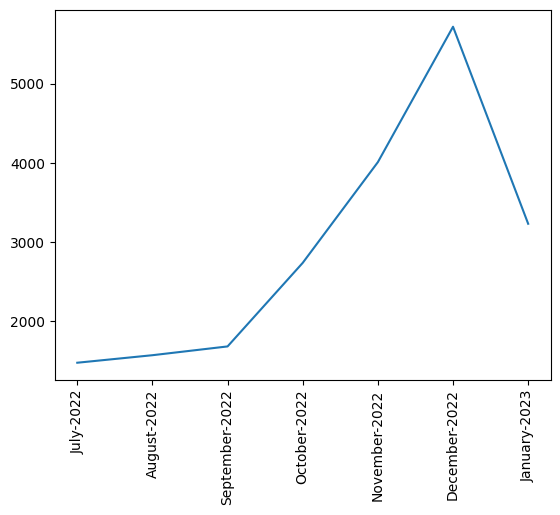

In [64]:
plt.plot(timeline['time'],timeline['user_messages'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df['only_date'] = df['Date'].dt.date
df.head()

,user_messages,Date,Users,Year,Month,Day,Hour,Minute,month_num,only_date
0,Messages and calls are end-to-end encrypted. N...,2022-07-07 22:56:00,group_notification,2022,July,7,22,56,7,2022-07-07
1,<Media omitted>\n,2022-07-07 23:11:00,Adi DS,2022,July,7,23,11,7,2022-07-07
2,Pendrive corrupt hua toh kya krne ka\n,2022-07-07 23:11:00,Sarvy,2022,July,7,23,11,7,2022-07-07
3,abhi hi naya liya na tu toh?\n,2022-07-07 23:12:00,Adi DS,2022,July,7,23,12,7,2022-07-07
4,<Media omitted>\n,2022-07-07 23:12:00,Sarvy,2022,July,7,23,12,7,2022-07-07


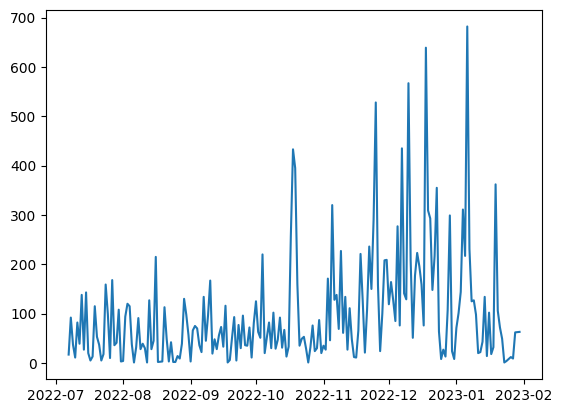

In [67]:
daily_timeline = df.groupby('only_date').count()['user_messages'].reset_index()
plt.plot(daily_timeline['only_date'],daily_timeline['user_messages'])
plt.show()

In [68]:
daily_timeline.head()

,only_date,user_messages
0,2022-07-07,17
1,2022-07-08,92
2,2022-07-09,37
3,2022-07-10,11
4,2022-07-11,82


In [69]:
daily_timeline.describe()

,user_messages
count,205.000000
mean,99.668293
std,113.241141
min,1.000000
25%,28.000000
50%,64.000000
75%,128.000000
max,682.000000


In [82]:
df['date_name']=df['Date'].dt.day_name()
df['date_name'].value_counts()

Friday       3499
Wednesday    3373
Saturday     3040
Thursday     2894
Tuesday      2861
Monday       2431
Sunday       2334
Name: date_name, dtype: int64